In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

warnings.simplefilter('ignore') # So that we can ignore depreciation issues in Python.
df = pd.read_csv('cluster2.csv',names=["x", "y"])
df.head()

,x,y
0,1.29100,0.69396
1,1.18090,-0.30723
2,3.28500,-4.64440
3,0.91569,1.12690
4,1.39120,0.40360


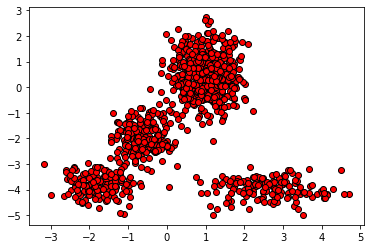

In [2]:
plt.scatter(df['x'], df['y'], color='r', edgecolor='k')

# Since the data points form a spherical structure and there is spacing between them visually I would prefer choosing k-means algorithm for clustering and applying elbow method to identify the optimal cluster count.

In [3]:
def mean_squared_error(cluster_count, data): # function to calculate the mean squared error
    kmeans = KMeans(n_clusters=cluster_count).fit(data)
    return(kmeans.inertia_) # returning the mean squared error value 

In [5]:
cluster_list = []
mean_squared_error_list = []
for i in range(1,10): 
    mean_squared_error_list.append(mean_squared_error(i,df))
    cluster_list.append(i)
dataframe1 = pd.DataFrame([cluster_list, mean_squared_error_list])
dataframe1 = dataframe1.transpose()
dataframe1.columns=['x','y']
dataframe1.head()

,x,y
0,1.0,6216.642971
1,2.0,2684.462359
2,3.0,1098.936374
3,4.0,670.485101
4,5.0,485.726153


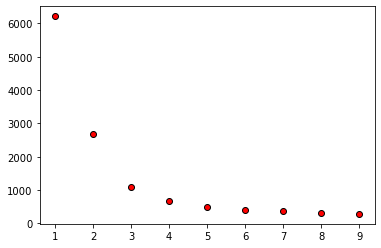

In [6]:
plt.scatter(dataframe1['x'], dataframe1['y'], c='r', edgecolor='k')

# Based on the elbow method the optimal clustering points are 3, 4 and 5. Inwhich i prefer to take 4 as per the concept mentioned in the lecture on week 7.

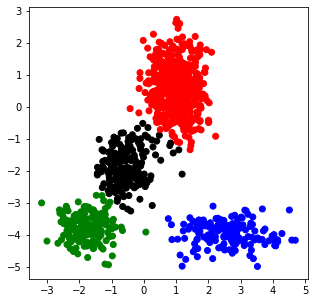

In [13]:
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'k'} # This for adding color mapping in the scatter plot
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labels = kmeans.predict(df) #This is the factor which helps in identifying the cluster 
centroids = kmeans.cluster_centers_ #This gives the centroid location in the cluster 
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels) #lambda function used to map the colors based on the labels
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1)
for idx,centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.show()

# To provide additional evidence as to why 4 is the optimal cluster count will apply DBSCAN algorithm

In [14]:
from sklearn.cluster import DBSCAN

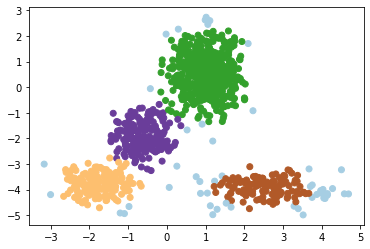

In [16]:
clustering = DBSCAN(eps=0.5, min_samples=30).fit(df) # intialising epselon value and min points
labels = clustering.labels_
plt.scatter(df['x'], df['y'], c=labels, cmap='Paired')

# As per Density based clustering there are few outlying points.Whereas large amount of core points: 
#### These are based on the epselon and min points parameter which is based on intuition from the 1st visual scatter plot of the input data points